In [153]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
from scipy.ndimage import uniform_filter1d
import IPython.display as ipd

# Import samples
kick_samples = [lr.load(p)[0] for p in Path().glob('../data/Kicks/*.wav')]
sr = [lr.load(p)[1] for p in Path().glob('../data/Kicks/*.wav')]

def extract_features(signal,sr):
    return [
        # np.mean(lr.feature.zero_crossing_rate(signal)[0]),
        lr.feature.spectral_centroid(y=signal)[0,0],
        lr.feature.spectral_bandwidth(y=signal)[0,0]
        # lr.feature.spectral_contrast(y=signal)[0,0],
        # lr.feature.spectral_flatness(y=signal)[0,0]
        # find_attack_time(signal,sr)[0]
    ]

def find_attack_time(signal,sr):
    frame_length = 2000
    hop_length = 200

    S = lr.stft(signal)
    envelope = lr.feature.rms(y=S, frame_length=frame_length, hop_length=hop_length, center=True)

    # Find the onset (the point where the signal exceeds a small threshold)
    onset_index = np.argmax(envelope > 0.01)  # Choose a threshold suitable for your sample

    # Find the peak (the highest point in the envelope)
    peak_index = np.argmax(envelope)

    # Calculate attack time
    attack_time = (peak_index - onset_index) / sr
    return attack_time

plt.figure(figsize=(5,14))

kick_features = np.array([extract_features(x,sr) for x in kick_samples])

scaler = MinMaxScaler((0,1))
scaled_features = scaler.fit_transform(kick_features[:,:])


<Figure size 500x1400 with 0 Axes>

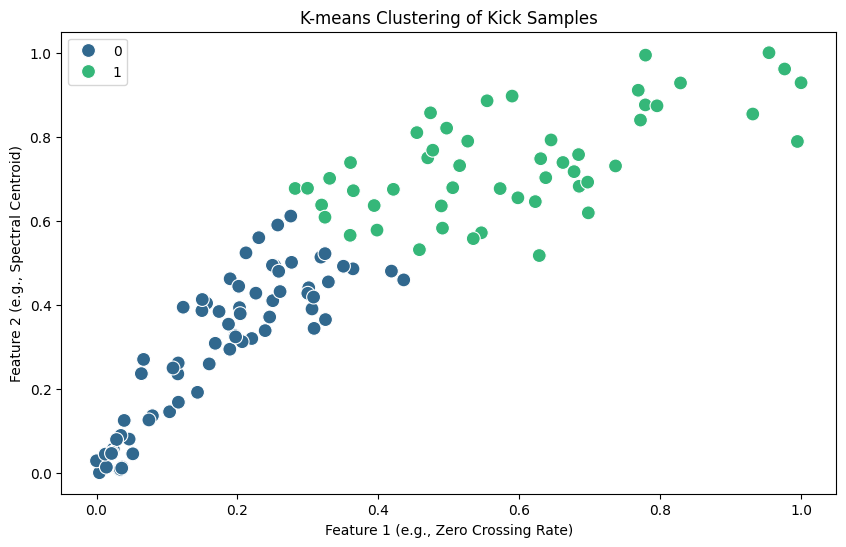

In [154]:
from sklearn.cluster import KMeans
import seaborn as sns

# Apply K-means clustering
n_clusters = 2  # You can change this based on how many different types of kicks you expect
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=labels, palette='viridis', s=100)
plt.xlabel('Feature 1 (e.g., Zero Crossing Rate)')
plt.ylabel('Feature 2 (e.g., Spectral Centroid)')
plt.title('K-means Clustering of Kick Samples')
plt.show()

In [227]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Assuming you have clustered your samples with K-means and stored labels in `kmeans_labels`
selected_sample_index = 6
# selected_sample_cluster = labels[selected_sample_index]

# Calculate similarity within the cluster
similarity_scores = pairwise_distances(scaled_features)
sorted_indices = np.argsort(similarity_scores[selected_sample_index])[::-1]  # Sort by highest similarity

sample_choices = sorted_indices[:5]
sorted_indices
# sample_choices[0]

array([  4,  30,  98,  18, 115,  67,  21,  16, 121,  26,  69,  64,  38,
        42,  41,  96,  76, 105,  93,  50,   1,  19, 118,  10,  99,  74,
        56,  83,  90,  71,  25,  35,  55,   5,  80,  89,  53,   2,  95,
        92,  86, 109,  24,  70,  78,  77,  87,  84,  27,  34,  29,  66,
        39,  49,  94, 117,  36, 101,  33, 107,  68,  59,  40,  75,  88,
       104,   9,  31,  17,  32, 100, 113,  20,  23, 103,  54,  72,  37,
        57,  51,  82, 102,  14,  60,  47,   3,  12, 111, 114,  48,  81,
         8,  46,  85,  63,  62,  15,  22,   7,  91,  79,  61, 110,  52,
         0,  58, 108, 106, 112, 116,  73, 120,  45,  11,  28,  13,  65,
        44, 119,  97,  43,   6])

In [228]:
ipd.Audio(kick_samples[selected_sample_index],rate=sr[selected_sample_index])

In [229]:
ipd.Audio(kick_samples[sample_choices[1]],rate=sr[sample_choices[1]])

In [230]:
ipd.Audio(kick_samples[sample_choices[2]],rate=sr[sample_choices[2]])

In [231]:

ipd.Audio(kick_samples[sample_choices[3]],rate=sr[sample_choices[3]])

In [226]:

ipd.Audio(kick_samples[sample_choices[4]],rate=sr[sample_choices[4]])